# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# **Importing Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
cars_data=pd.read_csv('CarPrice_Assignment.csv')



  

In [2]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Checking for relationships between features**

In [3]:
cars_data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [4]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# **Shuffling data and removing irrelevant data**

In [6]:
cars_data=shuffle(cars_data)
cars_data=cars_data.drop('CarName',axis=1)
cars_data=cars_data.drop('car_ID',axis=1)

In [7]:
cars_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,1,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0
90,1,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
66,0,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
157,0,gas,std,four,hatchback,fwd,front,95.7,166.3,64.4,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198.0


# **Encoding the features**

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cars_data['fueltype']=labelencoder.fit_transform(cars_data['fueltype'])
cars_data['aspiration']=labelencoder.fit_transform(cars_data['aspiration'])
cars_data['doornumber'] = cars_data['doornumber'].map({'two':2,'four':4})
cars_data['carbody']=labelencoder.fit_transform(cars_data['carbody'])
cars_data['drivewheel']=labelencoder.fit_transform(cars_data['drivewheel'])
cars_data['enginelocation']=labelencoder.fit_transform(cars_data['enginelocation'])
cars_data['enginetype']=labelencoder.fit_transform(cars_data['enginetype'])
cars_data['fuelsystem']=labelencoder.fit_transform(cars_data['fuelsystem'])
cars_data['cylindernumber'] = labelencoder.fit_transform(cars_data['cylindernumber'])



In [9]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 75 to 143
Data columns (total 24 columns):
symboling           205 non-null int64
fueltype            205 non-null int32
aspiration          205 non-null int32
doornumber          205 non-null int64
carbody             205 non-null int32
drivewheel          205 non-null int32
enginelocation      205 non-null int32
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null int32
cylindernumber      205 non-null int32
enginesize          205 non-null int64
fuelsystem          205 non-null int32
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          20

# **Manually splitting data**

In [10]:
train_data=cars_data.iloc[:103]
train_targets=cars_data.price.iloc[:103]
train_targets=np.asarray(train_targets)
train_data.drop('price',axis=1,inplace=True)


print(train_data.shape)

test_data=cars_data.iloc[103:166]
test_targets=cars_data.price.iloc[103:166]
test_targets=np.asarray(test_targets)
test_data.drop('price',axis=1,inplace=True)


print(test_data.shape)

(103, 23)
(63, 23)


In [11]:

val_data=cars_data.iloc[166:]
val_data.drop('price',axis=1,inplace=True)

val_targets=cars_data.price.iloc[166:]
val_targets=np.asarray(val_targets)



# **Checking for null values**

In [12]:
train_data.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [13]:
test_data.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [14]:
val_data.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

# **Creating model with 100 epochs **

In [15]:

model = models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(train_data.iloc[1].shape)))

model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.compile(optimizer='rmsprop', loss='mse', metrics=["accuracy","mse"])
his=model.fit(train_data,train_targets,epochs=100,batch_size=1,validation_data=(val_data,val_targets))

Train on 103 samples, validate on 39 samples
Epoch 1/100
103/103 [==============================] - 0s 3ms/sample - loss: 204428336.1408 - acc: 0.0000e+00 - mean_squared_error: 204428304.0000 - val_loss: 131204939.9391 - val_acc: 0.0000e+00 - val_mean_squared_error: 131204936.0000
Epoch 2/100
103/103 [==============================] - 0s 2ms/sample - loss: 108640378.6608 - acc: 0.0000e+00 - mean_squared_error: 108640368.0000 - val_loss: 64356093.1779 - val_acc: 0.0000e+00 - val_mean_squared_error: 64356084.0000
Epoch 3/100
103/103 [==============================] - 0s 2ms/sample - loss: 69586236.1694 - acc: 0.0000e+00 - mean_squared_error: 69586256.0000 - val_loss: 54434549.0378 - val_acc: 0.0000e+00 - val_mean_squared_error: 54434552.0000
Epoch 4/100
103/103 [==============================] - 0s 2ms/sample - loss: 63857880.3791 - acc: 0.0000e+00 - mean_squared_error: 63857876.0000 - val_loss: 53217165.2827 - val_acc: 0.0000e+00 - val_mean_squared_error: 53217168.0000
Epoch 5/100
103/1

Epoch 36/100
103/103 [==============================] - 0s 2ms/sample - loss: 35821285.6380 - acc: 0.0000e+00 - mean_squared_error: 35821292.0000 - val_loss: 24002717.6891 - val_acc: 0.0000e+00 - val_mean_squared_error: 24002714.0000
Epoch 37/100
103/103 [==============================] - 0s 2ms/sample - loss: 32562541.7833 - acc: 0.0000e+00 - mean_squared_error: 32562534.0000 - val_loss: 22674780.8108 - val_acc: 0.0000e+00 - val_mean_squared_error: 22674782.0000
Epoch 38/100
103/103 [==============================] - 0s 1ms/sample - loss: 33992733.0702 - acc: 0.0000e+00 - mean_squared_error: 33992736.0000 - val_loss: 21156344.7308 - val_acc: 0.0000e+00 - val_mean_squared_error: 21156348.0000
Epoch 39/100
103/103 [==============================] - 0s 1ms/sample - loss: 32643874.5662 - acc: 0.0000e+00 - mean_squared_error: 32643872.0000 - val_loss: 20194078.2532 - val_acc: 0.0000e+00 - val_mean_squared_error: 20194082.0000
Epoch 40/100
103/103 [==============================] - 0s 1ms/s

103/103 [==============================] - 0s 2ms/sample - loss: 24863371.5917 - acc: 0.0000e+00 - mean_squared_error: 24863378.0000 - val_loss: 11543722.7996 - val_acc: 0.0000e+00 - val_mean_squared_error: 11543723.0000
Epoch 72/100
103/103 [==============================] - 0s 2ms/sample - loss: 23584506.0673 - acc: 0.0000e+00 - mean_squared_error: 23584502.0000 - val_loss: 16771229.4502 - val_acc: 0.0000e+00 - val_mean_squared_error: 16771230.0000
Epoch 73/100
103/103 [==============================] - 0s 2ms/sample - loss: 24350894.2206 - acc: 0.0000e+00 - mean_squared_error: 24350902.0000 - val_loss: 13214876.0055 - val_acc: 0.0000e+00 - val_mean_squared_error: 13214875.0000
Epoch 74/100
103/103 [==============================] - 0s 2ms/sample - loss: 24210337.8561 - acc: 0.0000e+00 - mean_squared_error: 24210338.0000 - val_loss: 10898256.0861 - val_acc: 0.0000e+00 - val_mean_squared_error: 10898256.0000
Epoch 75/100
103/103 [==============================] - 0s 2ms/sample - loss:

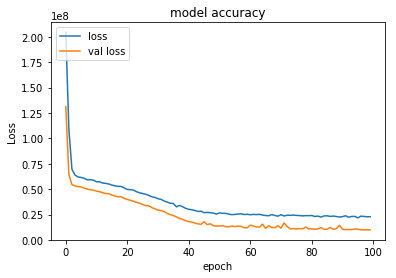

In [17]:
from matplotlib import pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [18]:
model.evaluate(test_data,test_targets)

63/63 [==============================] - 0s 127us/sample - loss: 20575525.6508 - acc: 0.0000e+00 - mean_squared_error: 20575524.0000


[20575525.65079365, 0.0, 20575524.0]

In [19]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [20]:
his.history.keys()

dict_keys(['loss', 'acc', 'mean_squared_error', 'val_loss', 'val_acc', 'val_mean_squared_error'])

# **Making new model according to the plotted graph**

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=(train_data.iloc[1].shape)))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(4,kernel_regularizer=regularizers.l2(0.01),activation='relu'))

model.add(layers.Dense(1))


In [30]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss="mse",metrics=['accuracy', 'mse'])
his=model.fit(train_data,train_targets,epochs=100,batch_size=1,validation_data=(val_data,val_targets))

Train on 103 samples, validate on 39 samples
Epoch 1/100
103/103 [==============================] - 1s 5ms/sample - loss: 239245642.6990 - acc: 0.0000e+00 - mean_squared_error: 239245616.0000 - val_loss: 202036117.9487 - val_acc: 0.0000e+00 - val_mean_squared_error: 202036144.0000
Epoch 2/100
103/103 [==============================] - 0s 2ms/sample - loss: 218586270.6699 - acc: 0.0000e+00 - mean_squared_error: 218586208.0000 - val_loss: 171183827.3333 - val_acc: 0.0000e+00 - val_mean_squared_error: 171183840.0000
Epoch 3/100
103/103 [==============================] - 0s 2ms/sample - loss: 168808102.6408 - acc: 0.0000e+00 - mean_squared_error: 168808064.0000 - val_loss: 117336864.7276 - val_acc: 0.0000e+00 - val_mean_squared_error: 117336888.0000
Epoch 4/100
103/103 [==============================] - 0s 2ms/sample - loss: 109731359.7000 - acc: 0.0000e+00 - mean_squared_error: 109731384.0000 - val_loss: 66129426.3964 - val_acc: 0.0000e+00 - val_mean_squared_error: 66129428.0000
Epoch 5/1

Epoch 36/100
103/103 [==============================] - 0s 2ms/sample - loss: 37248000.1921 - acc: 0.0000e+00 - mean_squared_error: 37248000.0000 - val_loss: 26838104.5601 - val_acc: 0.0000e+00 - val_mean_squared_error: 26838100.0000
Epoch 37/100
103/103 [==============================] - 0s 2ms/sample - loss: 36265328.3640 - acc: 0.0000e+00 - mean_squared_error: 36265328.0000 - val_loss: 24705334.7007 - val_acc: 0.0000e+00 - val_mean_squared_error: 24705334.0000
Epoch 38/100
103/103 [==============================] - 0s 2ms/sample - loss: 34518741.0281 - acc: 0.0000e+00 - mean_squared_error: 34518736.0000 - val_loss: 22546060.4303 - val_acc: 0.0000e+00 - val_mean_squared_error: 22546060.0000
Epoch 39/100
103/103 [==============================] - 0s 2ms/sample - loss: 33490620.6201 - acc: 0.0000e+00 - mean_squared_error: 33490616.0000 - val_loss: 21846814.4735 - val_acc: 0.0000e+00 - val_mean_squared_error: 21846816.0000
Epoch 40/100
103/103 [==============================] - 0s 2ms/s

103/103 [==============================] - 0s 2ms/sample - loss: 20530164.8790 - acc: 0.0000e+00 - mean_squared_error: 20530162.0000 - val_loss: 8319079.2115 - val_acc: 0.0000e+00 - val_mean_squared_error: 8319079.5000
Epoch 72/100
103/103 [==============================] - 0s 2ms/sample - loss: 21534468.1289 - acc: 0.0000e+00 - mean_squared_error: 21534466.0000 - val_loss: 12244669.1504 - val_acc: 0.0000e+00 - val_mean_squared_error: 12244670.0000
Epoch 73/100
103/103 [==============================] - 0s 2ms/sample - loss: 22406323.4173 - acc: 0.0000e+00 - mean_squared_error: 22406320.0000 - val_loss: 7995808.4625 - val_acc: 0.0000e+00 - val_mean_squared_error: 7995808.0000
Epoch 74/100
103/103 [==============================] - 0s 2ms/sample - loss: 21979399.4376 - acc: 0.0000e+00 - mean_squared_error: 21979396.0000 - val_loss: 9712626.2717 - val_acc: 0.0000e+00 - val_mean_squared_error: 9712624.0000
Epoch 75/100
103/103 [==============================] - 0s 2ms/sample - loss: 21586

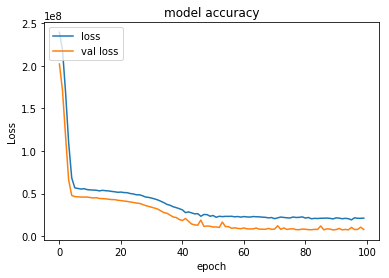

In [31]:
from matplotlib import pyplot as plt
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

# **Evauating results on test data**

In [32]:
model.evaluate(test_data,test_targets)

63/63 [==============================] - 0s 127us/sample - loss: 18795526.4603 - acc: 0.0000e+00 - mean_squared_error: 18795524.0000


[18795526.46031746, 0.0, 18795524.0]

# **Predicting value**

In [33]:
pred=model.predict(test_data)
pred[4]

array([8796.029], dtype=float32)

In [34]:
test_targets[4]

7957.0